In [1]:
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# read names that have provided survey eye color data
columns = ['name', 'left', 'right', 'left_desc', 'right_desc']

# pgp eye color data from survey
surveyData = pd.read_csv("PGP-eyecolor.csv", names=columns, na_values=['nan', ''])

# names of the pgp participants
surveyNames = np.asarray(surveyData['name'].values.tolist())

In [3]:
# load numpy array of names and keep only the huID
pgpNames = np.load("names.npy")
for i in range(len(pgpNames)):
    pgpNames[i] = pgpNames[i][:8]

# load numpy array of tiled PGP data 
pgp = np.load("hiq-pgp.npy")

In [4]:
# lookup a name in the survey data and return a tuple of the eye colors
def getData(name, surveyData):
    for index, row in surveyData.iterrows():
        if row['name'] == name:
            return (row['left'], row['right'])

In [11]:
# list of tuples for index and name with eye color data
namePairIndices = []

# dictionary of left and right eye colors with respective name, i.e., {"huID": 12}
nameLeftEyeMap = {}
nameRightEyeMap = {}

existingNames = []

# loop through pgpNames and add eye color to maps, making sure not to add the same name twice
for i in range(len(pgpNames)):
    name = pgpNames[i]
    if name in surveyNames and name not in existingNames:
        existingNames.append(name)
        eyeData = getData(name, surveyData)
        namePairIndices.append((i, name))
        nameLeftEyeMap[name] = eyeData[0]
        nameRightEyeMap[name] = eyeData[1]

# create lists containing the known eye color names and the unknown eye colors.
nameIndices = [nameIndex[0] for nameIndex in namePairIndices]
knownData = pgp[nameIndices]
unknownData = np.delete(pgp, nameIndices, axis=0)

In [17]:
# convert dictionaries to lists 
leftEyeNameList = []
rightEyeNameList = []

for nameTuple in namePairIndices:
    leftEyeNameList.append(nameLeftEyeMap[nameTuple[1]])
    rightEyeNameList.append(nameRightEyeMap[nameTuple[1]])
    
for i in range(len(leftEyeNameList)): # classify only blue/not blue, so change all the colors above 12 to not blue
    if leftEyeNameList[i] > 12:
        leftEyeNameList[i] = 1 # not blue
    else:
        leftEyeNameList[i] = 0 # blue

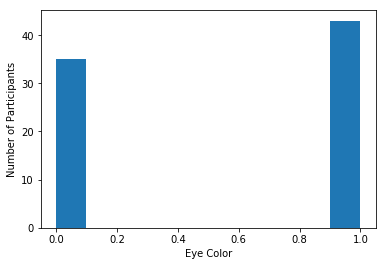

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(leftEyeNameList)
plt.ylabel("Number of Participants")
plt.xlabel("Eye Color")
plt.show()

In [19]:
from sklearn import preprocessing
knownData = preprocessing.scale(knownData.astype('double')) # scale the data
knownData

array([[-0.11396058,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.11396058,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.11396058,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-0.11396058,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.11396058,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.11396058,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

[LibLinear]0.6875


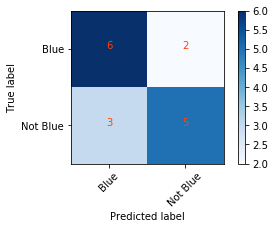

In [20]:
# train test split on the data
svc_test = LinearSVC(penalty='l1', class_weight='balanced', 
                         C=.06, dual=False, verbose=1, max_iter=1500)
X_train, X_test, y_train, y_test = train_test_split(knownData, leftEyeNameList, 
                                                    test_size=.2, random_state=1)
svc_test.fit(X_train, y_train)
y_pred = svc_test.predict(X_test)
print accuracy_score(y_test, y_pred)

# create confusion matrix - code taken from Sarah's blood type prediction
confusion_matrix(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')

classes = ['Blue','Not Blue']

plt.grid('off')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color= "orangered")

plt.gcf().subplots_adjust(left=0.25, bottom = 0.35)
plt.savefig('Blue_Confusion.png',format='png',dpi=300)

In [ ]:
svc_test = LinearSVC(penalty='l1', class_weight='balanced', 
                         C=.06, dual=False, verbose=1, max_iter=5000)
cv_scores = cross_val_score(svc_test, knownData, leftEyeNameList, cv=10, scoring='accuracy')
print
print cv_scores.mean()
print cv_scores.std()
print "\n\n"

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [9]:
# GridSearch CV to test for the C range and balance.
from sklearn.model_selection import GridSearchCV

crange = np.logspace(-2, 5, 10).tolist()

param_grid = dict(C=crange)
clf = LinearSVC(dual=False, penalty='l1', verbose=1, max_iter=1500)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(knownData, leftEyeNameList)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/home/kfang/miniconda2/lib/python2.7/site-packages/sklearn/svm/base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.05994842503189409, 0.35938136638046275, 2.1544346900318843, 12.91549665014884, 77.4263682681127, 464.1588833612782, 2782.559402207126, 16681.005372000593, 100000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [10]:
print grid.grid_scores_
print grid.best_score_
print grid.best_params_

[mean: 0.44304, std: 0.02071, params: {'C': 0.01}, mean: 0.65823, std: 0.11049, params: {'C': 0.05994842503189409}, mean: 0.65823, std: 0.11049, params: {'C': 0.35938136638046275}, mean: 0.53165, std: 0.12679, params: {'C': 2.1544346900318843}, mean: 0.50633, std: 0.16807, params: {'C': 12.91549665014884}, mean: 0.45570, std: 0.11797, params: {'C': 77.4263682681127}, mean: 0.43038, std: 0.16533, params: {'C': 464.1588833612782}, mean: 0.50633, std: 0.14984, params: {'C': 2782.559402207126}, mean: 0.56962, std: 0.20407, params: {'C': 16681.005372000593}, mean: 0.44304, std: 0.18492, params: {'C': 100000.0}]
0.658227848101
{'C': 0.05994842503189409}


/home/kfang/miniconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
